In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
cd /content/gdrive/My Drive/Untitled folder/wav

/content/gdrive/My Drive/Untitled folder/wav


In [28]:
import signal_processing, data_load, learn, evaluate, render

In [29]:
num_rows = 128
num_columns = 128
num_channels = 3

num_epochs = 100
num_batch_size = 13
num_speakers = 5
num_seconds = 2.9
fine_tune_at = 300
base_lr = 0.0001

In [ ]:
featuresdf = data_load.make_dataframe_2speakers(num_speakers, './', num_rows, num_columns, num_seconds, 'A.J._Buckley', 'Aaron_Tveit')

./id10001/1zcIwhmdeo4/00001.wav
Yes
./id10001/1zcIwhmdeo4/00002.wav
Yes
./id10001/1zcIwhmdeo4/00003.wav
Yes
./id10001/J9lHsKG98U8/00003.wav
Yes
./id10001/J9lHsKG98U8/00002.wav
Yes
./id10001/J9lHsKG98U8/00001.wav
Yes
./id10001/J9lHsKG98U8/00006.wav
Yes
./id10001/J9lHsKG98U8/00005.wav
Yes
./id10001/J9lHsKG98U8/00004.wav
Yes
./id10001/J9lHsKG98U8/00007.wav
Yes
./id10001/J9lHsKG98U8/00008.wav
Yes
./id10001/J9lHsKG98U8/00010.wav
Yes
./id10001/J9lHsKG98U8/00009.wav
Yes
./id10001/J9lHsKG98U8/00015.wav
Yes
./id10001/J9lHsKG98U8/00014.wav
Yes
./id10001/J9lHsKG98U8/00013.wav
Yes
./id10001/J9lHsKG98U8/00011.wav
Yes
./id10001/J9lHsKG98U8/00016.wav
Yes
./id10001/J9lHsKG98U8/00012.wav
Yes
./id10001/J9lHsKG98U8/00021.wav
Yes
./id10001/J9lHsKG98U8/00019.wav
Yes
./id10001/J9lHsKG98U8/00020.wav
Yes
./id10001/J9lHsKG98U8/00017.wav
Yes
./id10001/J9lHsKG98U8/00018.wav
Yes
./id10001/J9lHsKG98U8/00025.wav
Yes
./id10001/J9lHsKG98U8/00023.wav
Yes
./id10001/J9lHsKG98U8/00026.wav
Yes
./id10001/J9lHsKG98U8/00022.

In [30]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]

In [31]:
base_model = learn.get_densenet(num_rows, num_columns, num_channels, num_labels, fine_tune_at)

Number of layers in the base model:  428
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_______________________________________________

In [32]:
model = learn.build_model_densenet(base_model, num_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 2,891,458
Non-trainable params: 4,148,096
_________________________________________________________________


In [33]:
learn.compile_model_pretrained_net(model, base_lr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


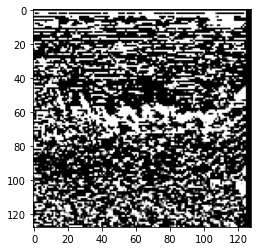

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
path = 'id10001/9mQ11vBs1wc/00004.wav'
#render.show_mfccs(path, num_rows, num_columns, num_seconds)

data = result_sets[0][1]
plt.imshow(data, cmap=cm.gray)

In [35]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 2,891,458
Non-trainable params: 4,148,096
_________________________________________________________________
5/5 [==============================] - 5s 966ms/step - loss: 14.8754 - accuracy: 0.3919
Pre-training accuracy: 39.1892%


In [36]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'DenseNet2Men', 'default', 'DenseNet2Men')

Epoch 1/100
12/12 [==============================] - ETA: 0s - loss: 0.7719 - accuracy: 0.6892
Epoch 00001: val_loss improved from inf to 1.13204, saving model to saved_models/weights.best.DenseNet2Men.hdf5
12/12 [==============================] - 12s 984ms/step - loss: 0.7719 - accuracy: 0.6892 - val_loss: 1.1320 - val_accuracy: 0.5135
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 0.4060 - accuracy: 0.8649
Epoch 00002: val_loss improved from 1.13204 to 0.94051, saving model to saved_models/weights.best.DenseNet2Men.hdf5
12/12 [==============================] - 11s 898ms/step - loss: 0.4060 - accuracy: 0.8649 - val_loss: 0.9405 - val_accuracy: 0.5676
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 0.9257
Epoch 00003: val_loss improved from 0.94051 to 0.70832, saving model to saved_models/weights.best.DenseNet2Men.hdf5
12/12 [==============================] - 11s 951ms/step - loss: 0.1877 - accuracy: 0.9257 - val_loss: 0.708

In [37]:
evaluate.evaluate_model(model, 'DenseNet2Men', result_sets)

Training Accuracy:  1.0
Testing Accuracy:  0.9459459185600281


In [38]:
evaluate.display_metrics(model, 'DenseNet2Men', result_sets)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.90      1.00      0.95        18

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37

Confusion matrix: 
[[17  2]
 [ 0 18]]


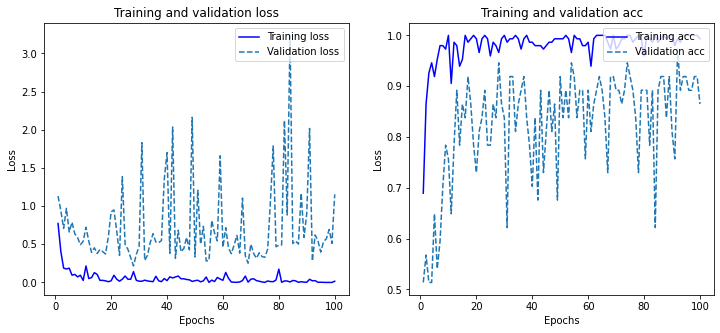

In [39]:
evaluate.plot_history(history)